Question 4 [10 marks]

In the spike trains folder you will find the data file stim.dat. This gives the motion stimulus that evoked the spike train in rho.dat. Calculate and plot the spike triggered average over a 100 ms window.

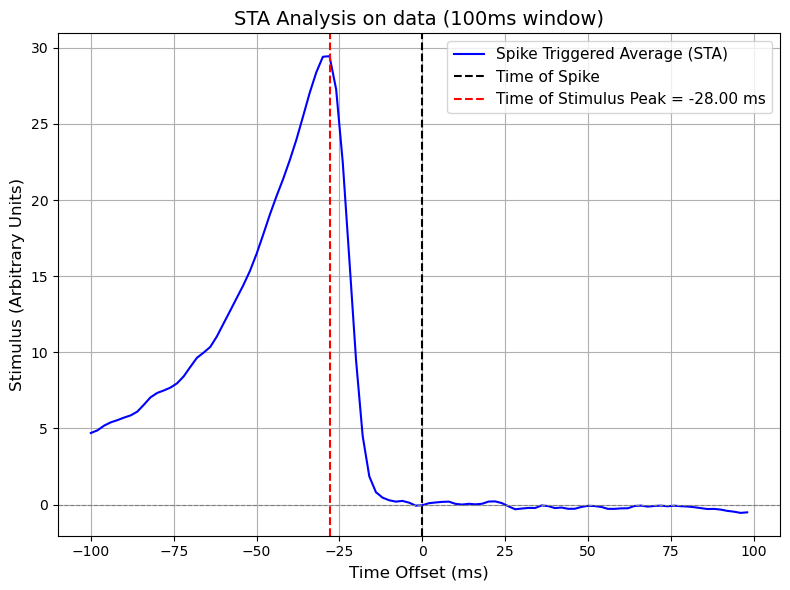

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the provided files
rho_file_path = 'rho.dat'  # Path to rho.dat
stim_file_path = 'stim.dat'  # Path to stim.dat
rho = np.loadtxt(rho_file_path)
stim = np.loadtxt(stim_file_path)

# Define parameters
sampling_interval = 2e-3  # 2 ms sampling interval
time_window = 0.1  # 100 ms in seconds
window_steps = int(time_window / sampling_interval)  # Convert time window to steps

# Convert rho to spike times
spike_times = np.nonzero(rho)[0] * sampling_interval  # Convert indices to times

# Calculate Spike-Triggered Average (STA)
time_offsets = np.arange(-window_steps, window_steps) * sampling_interval  # Time offsets for 100 ms before and after
sta = np.zeros(2 * window_steps)  # Initialize STA array for the full range

for spike_time in spike_times:
    spike_index = int(spike_time / sampling_interval)
    if spike_index >= window_steps and spike_index + window_steps < len(stim):  # Ensure valid window
        sta += stim[spike_index - window_steps:spike_index + window_steps]

sta /= len(spike_times)  # Average over spikes

# Find the peak value and its corresponding time
peak_value = np.max(sta)
peak_index = np.argmax(sta)
peak_time = time_offsets[peak_index] * 1000  # Convert to milliseconds

# Plot the Spike-Triggered Average (STA)
plt.figure(figsize=(8, 6))
plt.plot(time_offsets * 1000, sta, label="Spike Triggered Average (STA)", color="blue")  # Convert time_offsets to ms
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)

plt.axvline(0, color='black', linestyle='--', linewidth=1.5, label="Time of Spike")
plt.axvline(peak_time, color='red', linestyle='--', linewidth=1.5, label=f"Time of Stimulus Peak = {peak_time:.2f} ms")

# Add labels and titles
plt.xlabel("Time Offset (ms)", fontsize=12)
plt.ylabel("Stimulus (Arbitrary Units)", fontsize=12)
plt.title("STA Analysis on data (100ms window)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()
